In [1]:
%matplotlib inline

In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
#We can use this too.... for ols
"""from statsmodels.formula.api import ols
model2 = ols(formula = 'Y ~ X',data= data).fit()"""
#both ols(formula=...) and sm.OLS(...) yield the same result
#difference is that both are in different libraries
#and they have different syntax(which is quite visible)
np.random.seed(9876789)

In [3]:
#help(sm.OLS.fit) BOTH OF THEM WORKS
#sm.add_constant?
# USE TAB to complete long imports and all

In [4]:
#
nsample=100
x=np.linspace(0,10,100) #Return evenly spaced numbers over a specified interval. .linespace(starting, ending, no. of num b/w starting and ending)
X=np.column_stack((x,x**2)) #Take a sequence of 1-D arrays and stack them as columns to make a single 2-D array
beta=np.array([1,0.1,10])
e=np.random.normal(size=nsample)

In [5]:
x,X,beta,e

(array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
         0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
         1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
         1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
         2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
         2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
         3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
         3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
         4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
         4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
         5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
         5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
         6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
         6.56565657,  6.66666667,  6.76767677,  6.8

In [6]:
#Our model needs an intercept so we add a column of 1s
X=sm.add_constant(X) # .add_constnat(data): The original values with a constant (column of ones) as the first or last column. Returned value depends on input type.
y=np.dot(X,beta)+e

In [7]:
X

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.01010101e-01, 1.02030405e-02],
       [1.00000000e+00, 2.02020202e-01, 4.08121620e-02],
       [1.00000000e+00, 3.03030303e-01, 9.18273646e-02],
       [1.00000000e+00, 4.04040404e-01, 1.63248648e-01],
       [1.00000000e+00, 5.05050505e-01, 2.55076013e-01],
       [1.00000000e+00, 6.06060606e-01, 3.67309458e-01],
       [1.00000000e+00, 7.07070707e-01, 4.99948985e-01],
       [1.00000000e+00, 8.08080808e-01, 6.52994592e-01],
       [1.00000000e+00, 9.09090909e-01, 8.26446281e-01],
       [1.00000000e+00, 1.01010101e+00, 1.02030405e+00],
       [1.00000000e+00, 1.11111111e+00, 1.23456790e+00],
       [1.00000000e+00, 1.21212121e+00, 1.46923783e+00],
       [1.00000000e+00, 1.31313131e+00, 1.72431385e+00],
       [1.00000000e+00, 1.41414141e+00, 1.99979594e+00],
       [1.00000000e+00, 1.51515152e+00, 2.29568411e+00],
       [1.00000000e+00, 1.61616162e+00, 2.61197837e+00],
       [1.00000000e+00, 1.71717

In [8]:
y

array([1.59484106e-01, 2.70962667e+00, 1.89386568e+00, 1.44041774e+00,
       5.60719622e+00, 4.01415960e+00, 3.79042816e+00, 5.49896267e+00,
       7.93934063e+00, 9.31871940e+00, 1.16151797e+01, 1.30800908e+01,
       1.65916731e+01, 1.90612419e+01, 2.22779839e+01, 2.22973772e+01,
       2.90728303e+01, 2.95174936e+01, 3.43906010e+01, 3.68997190e+01,
       4.15314299e+01, 4.65124798e+01, 4.87622029e+01, 5.54649378e+01,
       6.03995721e+01, 6.68905550e+01, 7.10273234e+01, 7.57840504e+01,
       8.32307851e+01, 8.80067872e+01, 9.24604592e+01, 1.00869036e+02,
       1.05000770e+02, 1.13078878e+02, 1.18651097e+02, 1.26357451e+02,
       1.32682080e+02, 1.39131512e+02, 1.47437302e+02, 1.56109386e+02,
       1.64097051e+02, 1.73688174e+02, 1.81821259e+02, 1.88890813e+02,
       1.99352099e+02, 2.10227715e+02, 2.16641136e+02, 2.28077202e+02,
       2.37086627e+02, 2.45435044e+02, 2.56253216e+02, 2.66268455e+02,
       2.77388427e+02, 2.88835852e+02, 2.97996070e+02, 3.11225764e+02,
      

In [9]:
#Fit and summary
model=sm.OLS(y,X)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.020e+06
Date:                Wed, 18 Mar 2020   Prob (F-statistic):          2.83e-239
Time:                        21:18:23   Log-Likelihood:                -146.51
No. Observations:                 100   AIC:                             299.0
Df Residuals:                      97   BIC:                             306.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3423      0.313      4.292      0.000       0.722       1.963
x1            -0.0402      0.145     -0.278      0.781      -0.327       0.247
x2            10.0103      0.014    715.745      0.000       9.982      10.038
==============================================================================
Omnibus:                        2.042   Durbin-Watson:                   2.274
Prob(Omnibus):                  0.360   Jarque-Bera (JB):                1.875
Skew:                           0.234   Prob(JB):                        0.392
Kurtosis:                       2.519   Cond. No.                         144.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
dir(result)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',
 'model',


In [11]:
print("Parameters: ",result.params)
print("R2", result.rsquared)

Parameters:  [ 1.34233516 -0.04024948 10.01025357]
R2 0.9999879365025871


In [12]:
"OLS non-linear curve but linear in parameters"
#We simulate artificial data with a non-linear relationship between x and y:
nsample=50
sig=0.5
x=np.linspace(0,20,nsample)
X=np.column_stack((x, np.sin(x), (x-5)**2, np.ones(nsample)))
beta=[0.5,0.5, -0.02, 5.]

y_true=np.dot(X, beta)
y=y_true+sig*np.random.normal(size=nsample)

In [13]:
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [14]:
X

array([[ 0.00000000e+00,  0.00000000e+00,  2.50000000e+01,
         1.00000000e+00],
       [ 4.08163265e-01,  3.96924149e-01,  2.10849646e+01,
         1.00000000e+00],
       [ 8.16326531e-01,  7.28634783e-01,  1.75031237e+01,
         1.00000000e+00],
       [ 1.22448980e+00,  9.40632785e-01,  1.42544773e+01,
         1.00000000e+00],
       [ 1.63265306e+00,  9.98087482e-01,  1.13390254e+01,
         1.00000000e+00],
       [ 2.04081633e+00,  8.91559230e-01,  8.75676801e+00,
         1.00000000e+00],
       [ 2.44897959e+00,  6.38550320e-01,  6.50770512e+00,
         1.00000000e+00],
       [ 2.85714286e+00,  2.80629400e-01,  4.59183673e+00,
         1.00000000e+00],
       [ 3.26530612e+00, -1.23398137e-01,  3.00916285e+00,
         1.00000000e+00],
       [ 3.67346939e+00, -5.07151709e-01,  1.75968347e+00,
         1.00000000e+00],
       [ 4.08163265e+00, -8.07581691e-01,  8.43398584e-01,
         1.00000000e+00],
       [ 4.48979592e+00, -9.75328286e-01,  2.60308205e-01,
      

In [15]:
y_true

array([ 4.5       ,  4.98084442,  5.42241818,  5.79747174,  6.08858976,
        6.29105242,  6.41361085,  6.47704939,  6.51077074,  6.54796517,
        6.62015751,  6.75202765,  6.95735574,  7.23675814,  7.57758613,
        7.95600411,  8.34090568,  8.69902434,  9.0003991 ,  9.22329697,
        9.35778363,  9.40735561,  9.38836583,  9.32733686,  9.25660331,
        9.20899939,  9.21246432,  9.28545197,  9.43389898,  9.65024938,
        9.91469599, 10.19843472, 10.46839697, 10.69268271, 10.84580159,
       10.91286091, 10.89201244, 10.79475611, 10.64405059, 10.47054122,
       10.30752511, 10.1854805 , 10.12705925, 10.14336524, 10.23213001,
       10.37808548, 10.55547244, 10.7322727 , 10.87546961, 10.95647263])

In [16]:
y

array([ 4.48933467,  5.34231784,  5.81681264,  6.69809894,  5.94032168,
        6.65120265,  6.59592036,  6.07958661,  6.36186999,  6.7775208 ,
        6.6836138 ,  6.56551043,  7.17869566,  7.25158876,  8.04903067,
        7.84930564,  8.39547421,  8.25715349,  9.42432217,  8.43407786,
        9.70661341,  8.17868934, 10.44401028,  8.72852257,  9.32853046,
        9.70458442,  8.58017153,  9.78906458, 10.20670793,  9.20752194,
        9.26055989, 10.66574522,  9.89388631, 11.87907875, 10.65688892,
       11.09346875, 10.77674283, 10.11844363, 10.75104318, 10.19883781,
       10.68264587, 10.73214468, 10.13324477,  9.6745733 , 10.05157595,
       10.74993283, 10.4821192 , 10.38354809, 11.52270194, 11.19546067])

In [17]:
res=sm.OLS(y,X).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     211.8
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           6.30e-27
Time:                        21:18:26   Log-Likelihood:                -34.438
No. Observations:                  50   AIC:                             76.88
Df Residuals:                      46   BIC:                             84.52
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4687      0.026     17.751      0.000       0.416       0.522
x2             0.4836      0.104      4.659      0.000       0.275       0.693
x3            -0.0174      0.002     -7.507      0.000      -0.022      -0.013
const          5.2058      0.171     30.405      0.000       4.861       5.550
==============================================================================
Omnibus:                        0.655   Durbin-Watson:                   2.896
Prob(Omnibus):                  0.721   Jarque-Bera (JB):                0.360
Skew:                           0.207   Prob(JB):                        0.835
Kurtosis:                       3.026   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#Extract other quantities of interest:
print(res.params)
print(res.bse)
print(res.predict())

[ 0.46872448  0.48360119 -0.01740479  5.20584496]
[0.02640602 0.10380518 0.00231847 0.17121765]
[ 4.77072516  5.22213464  5.63620761  5.98658823  6.25643234  6.44117491
  6.54928009  6.60085051  6.62432454  6.6518039   6.71377946  6.83412169
  7.02615877  7.29048685  7.61487206  7.97626054  8.34456611  8.68761335
  8.97642389  9.18997755  9.31866582  9.36587056  9.34740836  9.28893189
  9.22171529  9.17751587  9.1833565   9.25708583  9.40444579  9.61812821
  9.87897556 10.15912843 10.42660281 10.65054491 10.8063004  10.87946503
 10.86825119 10.78378163 10.64826203 10.49133265 10.34519853 10.23933827
 10.19566084 10.22490593 10.32487947 10.48081414 10.66779556 10.85485568
 11.01006072 11.10575781]


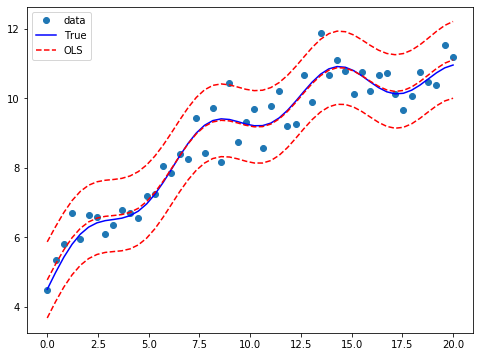

In [19]:
#Draw a plot to compare the true relationship to OLS predictions. 
#Confidence intervals around 
#the predictions are built using the wls_prediction_std command.

prstd,iv_l,iv_u= wls_prediction_std(res)
fig, ax= plt.subplots(figsize=(8,6))

ax.plot(x,y,"o", label="data")
ax.plot(x,y_true,"b-",label="True")
ax.plot(x,res.fittedvalues,"r--",label="OLS")
ax.plot(x,iv_u,"r--")
ax.plot(x,iv_l,"r--")
ax.legend(loc="best")

In [20]:
"OLS with dummy variables"
""" We generate some artificial data. 
There are 3 groups which will be modelled using dummy variables. 
Group 0 is the omitted/benchmark category."""

nsample=50
groups=np.zeros(nsample,int)
groups[20:40]=1
groups[40:]=2
#dummy = (groups[:,None] == np.unique(groups)).astype(float)

dummy=sm.categorical(groups,drop=True)
x=np.linspace(0,20,nsample)
#drop referecne category
X=np.column_stack((x,dummy[:,1:]))
X=sm.add_constant(X, prepend=False)

beta=[1., 3, -3, 10]
y_true=np.dot(X, beta)
e=np.random.normal(size=nsample)
y=y_true+e

In [21]:
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2])

In [22]:
x

array([ 0.        ,  0.40816327,  0.81632653,  1.2244898 ,  1.63265306,
        2.04081633,  2.44897959,  2.85714286,  3.26530612,  3.67346939,
        4.08163265,  4.48979592,  4.89795918,  5.30612245,  5.71428571,
        6.12244898,  6.53061224,  6.93877551,  7.34693878,  7.75510204,
        8.16326531,  8.57142857,  8.97959184,  9.3877551 ,  9.79591837,
       10.20408163, 10.6122449 , 11.02040816, 11.42857143, 11.83673469,
       12.24489796, 12.65306122, 13.06122449, 13.46938776, 13.87755102,
       14.28571429, 14.69387755, 15.10204082, 15.51020408, 15.91836735,
       16.32653061, 16.73469388, 17.14285714, 17.55102041, 17.95918367,
       18.36734694, 18.7755102 , 19.18367347, 19.59183673, 20.        ])

In [23]:
X

array([[ 0.        ,  0.        ,  0.        ,  1.        ],
       [ 0.40816327,  0.        ,  0.        ,  1.        ],
       [ 0.81632653,  0.        ,  0.        ,  1.        ],
       [ 1.2244898 ,  0.        ,  0.        ,  1.        ],
       [ 1.63265306,  0.        ,  0.        ,  1.        ],
       [ 2.04081633,  0.        ,  0.        ,  1.        ],
       [ 2.44897959,  0.        ,  0.        ,  1.        ],
       [ 2.85714286,  0.        ,  0.        ,  1.        ],
       [ 3.26530612,  0.        ,  0.        ,  1.        ],
       [ 3.67346939,  0.        ,  0.        ,  1.        ],
       [ 4.08163265,  0.        ,  0.        ,  1.        ],
       [ 4.48979592,  0.        ,  0.        ,  1.        ],
       [ 4.89795918,  0.        ,  0.        ,  1.        ],
       [ 5.30612245,  0.        ,  0.        ,  1.        ],
       [ 5.71428571,  0.        ,  0.        ,  1.        ],
       [ 6.12244898,  0.        ,  0.        ,  1.        ],
       [ 6.53061224,  0.

In [24]:
res2=sm.OLS(y,X).fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                     671.7
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           5.69e-38
Time:                        21:18:31   Log-Likelihood:                -64.643
No. Observations:                  50   AIC:                             137.3
Df Residuals:                      46   BIC:                             144.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9999      0.060     16.689      0.000       0.879       1.121
x2             2.8909      0.569      5.081      0.000       1.746       4.036
x3            -3.2232      0.927     -3.477      0.001      -5.089      -1.357
const         10.1031      0.310     32.573      0.000       9.479      10.727
==============================================================================
Omnibus:                        2.831   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                1.927
Skew:                          -0.279   Prob(JB):                        0.382
Kurtosis:                       2.217   Cond. No.                         96.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

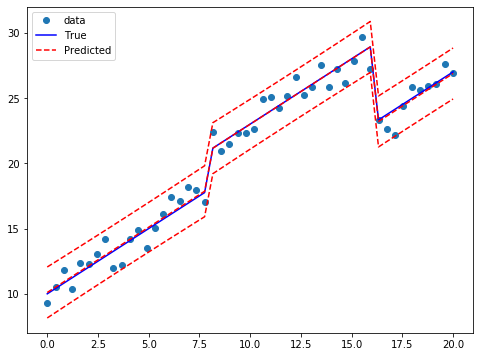

In [25]:
#Draw a plot to compare the true relationship to OLS predictions:
prstd, iv_l, iv_u= wls_prediction_std(res2)

fig, ax= plt.subplots(figsize=(8,6))

ax.plot(x,y,"o",label="data")
ax.plot(x,y_true,"b-",label="True")
ax.plot(x, res2.fittedvalues,"r--",label="Predicted")
ax.plot(x,iv_u,"r--")
ax.plot(x,iv_l,"r--")
legend=ax.legend(loc="best")

In [27]:
"Joint hypothesis test"
"""F test
We want to test the hypothesis that both coefficients on the dummy variables are equal to zero, 
that is, R×β=0. 
An F test leads us to strongly reject the null hypothesis of identical constant in the 3 groups:"""
R=[[0,1,0,0],[0,0,1,0]]
print(np.array(R))
print(res2.f_test(R))

[[0 1 0 0]
 [0 0 1 0]]
<F test: F=array([[145.49268198]]), p=1.2834419617291377e-20, df_denom=46, df_num=2>


In [31]:
#You can also use formula-like syntax to test hypotheses
res2.f_test("x2=x3=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[145.49268198]]), p=1.2834419617291078e-20, df_denom=46, df_num=2>

In [33]:
"Small group effects"
"""If we generate artificial data with smaller group effects, the T test can no longer reject the Null hypothesis:"""
beta=[1.,0.3,-0.0,10]
y_true=np.dot(X,beta)
y=y_true+np.random.normal(size=nsample)

res3=sm.OLS(y,X).fit()

In [35]:
res3.f_test(R)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.22491119]]), p=0.3031864410632063, df_denom=46, df_num=2>

In [40]:
res3.f_test("x2=x3=0")

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[1.22491119]]), p=0.3031864410632063, df_denom=46, df_num=2>

In [49]:
"Multicollinearity"
"""The Longley dataset is well known to have high multicollinearity. 
That is, the exogenous predictors are highly correlated. 
This is problematic because
it can affect the stability of our coefficient estimates as we make minor changes to model specification."""

from statsmodels.datasets.longley import load_pandas
y=load_pandas().endog
X=load_pandas().exog
X=sm.add_constant(X)

C:\Users\SHIVLEON\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [50]:
load_pandas?

In [53]:
ols_result=sm.OLS(y,X).fit()

In [54]:
ols_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 TOTEMP   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     330.3
Date:                Wed, 18 Mar 2020   Prob (F-statistic):           4.98e-10
Time:                        21:31:40   Log-Likelihood:                -109.62
No. Observations:                  16   AIC:                             233.2
Df Residuals:                       9   BIC:                             238.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.482e+06    8.9e+05     -3.911      0.004    -5.5e+06   -1.47e+06
GNPDEFL       15.0619     84.915      0.177      0.863    -177.029     207.153
GNP           -0.0358      0.033     -1.070      0.313      -0.112       0.040
UNEMP         -2.0202      0.488     -4.136      0.003      -3.125      -0.915
ARMED         -1.0332      0.214     -4.822      0.001      -1.518      -0.549
POP           -0.0511      0.226     -0.226      0.826      -0.563       0.460
YEAR        1829.1515    455.478      4.016      0.003     798.788    2859.515
==============================================================================
Omnibus:                        0.749   Durbin-Watson:                   2.559
Prob(Omnibus):                  0.688   Jarque-Bera (JB):                0.684
Skew:                           0.420   Prob(JB):                        0.710
Kurtosis:                       2.434   Cond. No.                     4.86e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.86e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""